# Стохастический градиентный и координатный спуски

## Загрузка и подготовка данных (1 балл)

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
# Импорт библиотек

import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
import matplotlib.pyplot as plt 

data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
# Исследуем данные на предмет пропусков:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
X = np.array(data.drop(['Unnamed: 0', 'sales'], axis=1))
y = np.array(data['sales'])

## Координатный спуск (2 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
num_iters = 1000
m = X.shape[0] # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros(n) #вектор размера (n x 1), состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        h = h.reshape(-1, 1)
        # Обновляем новое значение k-ого коэффициента
        w[k] = (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = (sum((X @ w) - y) ** 2)/(len(y))
display(w)
y_pred_cd = X @ w
MSE_cd = np.sum(np.square(y-y_pred_cd)) / len(y)
display(f'Средняя квадратичная ошибка sklearn LinearRegression {round(MSE_cd, 0)}')

C:\Users\IK\AppData\Local\Temp\ipykernel_868\2140960860.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[k] = (X[:,k].T @ (y - h))


array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384])

'Средняя квадратичная ошибка sklearn LinearRegression 10277.0'

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (7 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [8]:
X = np.array(data.drop(['Unnamed: 0', 'sales'], axis=1))
X = (X-np.mean(X)) / np.std(X)

**Добавим единичный столбец**

In [9]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [10]:
def mse_error(y, y_pred):
    return np.sum(np.square(y-y_pred)) / len(y)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза**

In [11]:
mse = mse_error(y, np.mean(y))
mse

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов**

In [12]:
def lin_pred(X, w):
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.  
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [13]:
def stoch_grad_step(X, y, w, train_ind, eta):
    #направление градиентного спуска на одном элементе выборки 
    d = (2*X[train_ind]*(lin_pred(X[train_ind], w) - y[train_ind]))
    return (w - d * eta)

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [14]:
def stochastic_gradient_descent(X, y, w0, eta, max_iter, norm_end):
    norm = np.Infinity
    mse_list = []
    j = 0
    w = w0.copy()
    while (norm > norm_end) and (j < max_iter):
        i = np.random.randint(len(y))
        y_pred = lin_pred(X, w)
        mse_list.append(mse_error(y, y_pred))
        w_old = w.copy()
        w = stoch_grad_step(X, y, w, i, eta)
        norm = np.linalg.norm(w-w_old)
        j += 1
    return w, np.array(mse_list), j

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [15]:
SGD_0_1 = stochastic_gradient_descent(X, y, w0=np.zeros(X.shape[1]), eta = 0.1, max_iter=100000, norm_end = 0.00001)
SGD_0_1

SGD_0_01 = stochastic_gradient_descent(X, y, w0=np.zeros(X.shape[1]), eta = 0.01, max_iter=100000, norm_end = 0.00001)
SGD_0_01

SGD_0_001 = stochastic_gradient_descent(X, y, w0=np.zeros(X.shape[1]), eta = 0.001, max_iter=100000, norm_end = 0.00001)
SGD_0_001

(array([ 3.93213827,  4.21207679, -1.98188183, -1.61435557]),
 array([44743.25      , 44007.27250585, 43785.75733208, 42961.40372405,
        42187.45425824, 41986.780796  , 41494.10872333, 40749.21546552,
        40724.71021677, 40215.62052397, 39309.52000044, 39247.23478396,
        38361.86258638, 37856.36788864, 37675.37500427, 37272.70660806,
        37247.26804854, 37066.1033779 , 36799.23732855, 36682.72165725,
        36569.36916593, 35953.38159367, 35781.61238813, 35504.02108357,
        35153.91464718, 35006.55851406, 34386.09453835, 33822.0795191 ,
        33368.87048521, 33096.64783128, 32629.26119427, 32229.87060284,
        32022.01554517, 31789.04324431, 31729.68595018, 31482.19925508,
        31341.84875089, 30976.68658582, 30607.68206606, 30431.04412825,
        30384.56912923, 30118.80485748, 30109.58307076, 29882.88413478,
        29776.51791083, 29526.77947738, 29287.87446513, 28863.86946586,
        28660.134559  , 28278.47760809, 28237.29583344, 28089.71511882,
  

<function matplotlib.pyplot.show(close=None, block=None)>

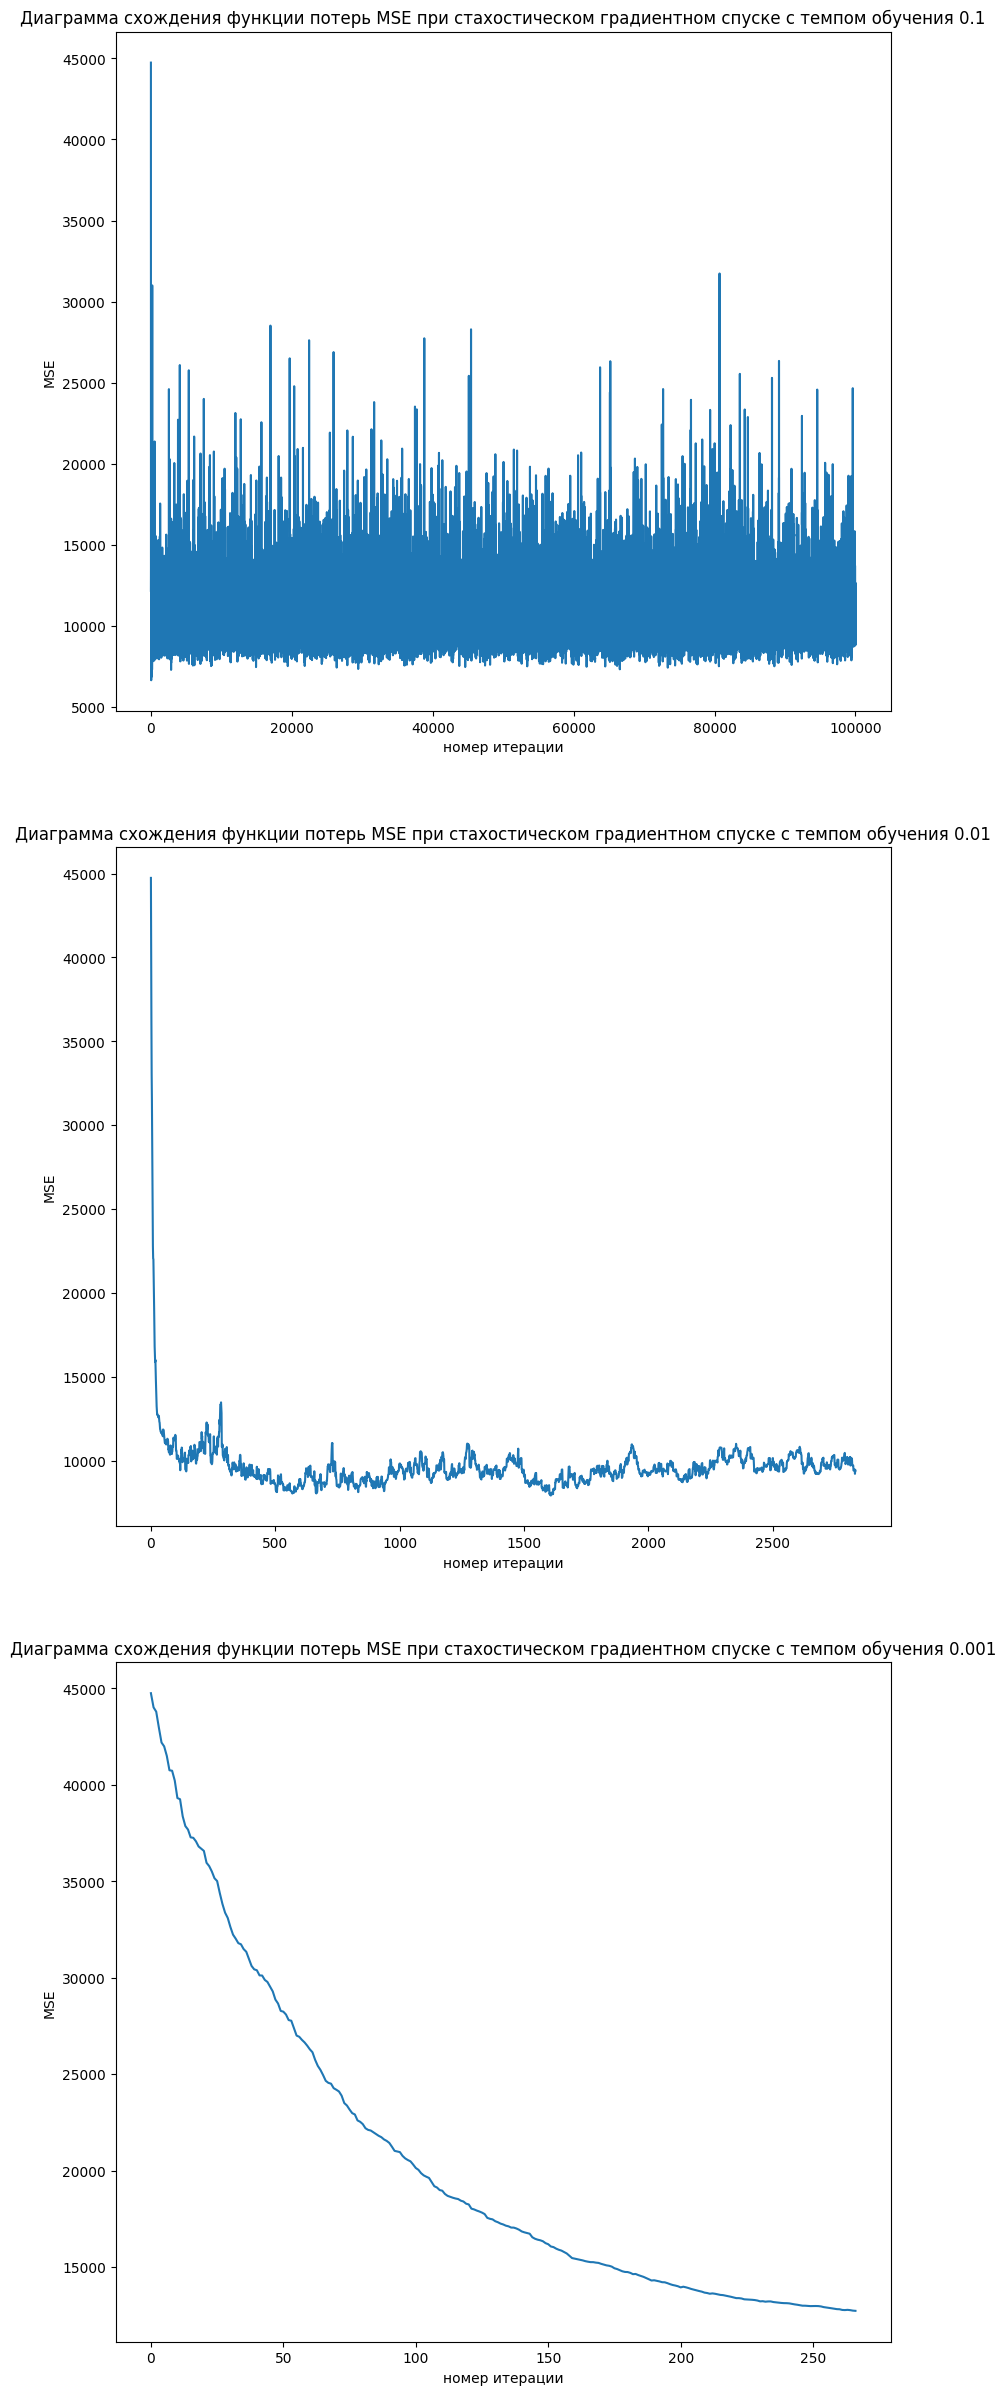

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))
ax[0].plot(range(len(SGD_0_1[1])), SGD_0_1[1])
ax[0].set(ylabel='MSE',
          xlabel='номер итерации',
          title = 'Диаграмма схождения функции потерь MSE при стахостическом градиентном спуске с темпом обучения 0.1')
ax[1].plot(range(len(SGD_0_01[1])), SGD_0_01[1])
ax[1].set(ylabel='MSE',
          xlabel='номер итерации',
          title = 'Диаграмма схождения функции потерь MSE при стахостическом градиентном спуске с темпом обучения 0.01')
ax[2].plot(range(len(SGD_0_001[1])), SGD_0_001[1])
ax[2].set(ylabel='MSE',
          xlabel='номер итерации',
          title = 'Диаграмма схождения функции потерь MSE при стахостическом градиентном спуске с темпом обучения 0.001')
plt.show

**Выведите вектор весов, к которому сошелся метод.**

In [17]:
display(f'Вектор весов w с темпом обучения 0.1: {SGD_0_1[0]}')
display(f'Вектор весов w с темпом обучения 0.01: {SGD_0_01[0]}')
display(f'Вектор весов w с темпом обучения 0.001: {SGD_0_001[0]}')

'Вектор весов w с темпом обучения 0.1: [19.73488118  3.61795341 14.83161092 -0.45069175]'

'Вектор весов w с темпом обучения 0.01: [16.55690487  3.44376043 10.38089735  0.54479148]'

'Вектор весов w с темпом обучения 0.001: [ 3.93213827  4.21207679 -1.98188183 -1.61435557]'

**Выведите среднеквадратичную ошибку на последней итерации.**

In [18]:
MSE_sgd_0_1 = mse_error(y, lin_pred(X, SGD_0_1[0]))
display(f'Среднеквадратичная ошибка на последней итерации при темпе обучения 0.1: {MSE_sgd_0_1}')
MSE_sgd_0_01 = mse_error(y, lin_pred(X, SGD_0_01[0]))
display(f'Среднеквадратичная ошибка на последней итерации при темпе обучения 0.01: {MSE_sgd_0_01}')
MSE_sgd_0_001 = mse_error(y, lin_pred(X, SGD_0_001[0]))
display(f'Среднеквадратичная ошибка на последней итерации при темпе обучения 0.001: {MSE_sgd_0_001}')

'Среднеквадратичная ошибка на последней итерации при темпе обучения 0.1: 10824.357373226892'

'Среднеквадратичная ошибка на последней итерации при темпе обучения 0.01: 9403.405636994525'

'Среднеквадратичная ошибка на последней итерации при темпе обучения 0.001: 12732.621524665512'